In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS
from astropy.nddata.utils import Cutout2D
from matplotlib.colors import LogNorm


def aperature(image,radius,center):
    n = len(image[0])
    center_x = center[1]
    center_y = center[0]
    y,x = np.ogrid[-center_y:n-center_y, - center_x:n-center_x]
    mask = x**2 + y**2 <= radius**2
    
    counts = image[mask]
    return sum(counts)


In [2]:
# with fits.open('/Users/connor_auge/Desktop/herschel/L2-COSMOS/L2-COSMOS_image_SMAP250_DR2.fits') as hdul:
#     print(len(hdul))
#     head = hdul[1].header
#     wcs1 = WCS(hdul[0].header)
#     data = hdul[0].data
#     data_err = hdul[1].data
#     data_check = hdul[2].data
        
# with fits.open('/Users/connor_auge/Desktop/L2-COSMOS_image_SMAP250_DR2_check.fits') as hdul:
#     print(hdul)
#     head = hdul[1].header
#     data = hdul[1].data
#     err = hdul[2].data
#     exp = hdul[3].data
#     mask = hdul[4].data
#     wcs1 = WCS(hdul[1].header)
    
with fits.open('/Users/connor_auge/Desktop/) as hdul:
    print(hdul)
    head = hdul[1].header
    data = hdul[1].data
    err = hdul[2].data
    exp = hdul[3].data
    mask = hdul[4].data
    wcs1 = WCS(hdul[1].header)
    
        
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/chandra_COSMOS_legacy_opt_NIR_counterparts_20160113_4d.fits') as hdul:
    cols = hdul[1].columns
    cosmos = hdul[1].data
    
with fits.open('/Users/connor_auge/Research/Disertation/catalogs/cosmos2020/classic/COSMOS2020_CLASSIC_R1_v2.0_master.fits') as hdul:
    cosmos = hdul[1].data
    cosmos_cols = hdul[1].columns

[<astropy.io.fits.hdu.image.PrimaryHDU object at 0x132ae3b20>, <astropy.io.fits.hdu.image.ImageHDU object at 0x10697d370>, <astropy.io.fits.hdu.image.ImageHDU object at 0x10697d3a0>, <astropy.io.fits.hdu.image.ImageHDU object at 0x10697d580>, <astropy.io.fits.hdu.image.ImageHDU object at 0x10697da90>]


Set MJD-END to 55733.595211 from DATE-END'. [astropy.wcs.wcs]


In [3]:
head

XTENSION= 'IMAGE   '           / IMAGE extension                                
BITPIX  =                  -64 / Number of bits per data pixel                  
NAXIS   =                    2 / Number of data axes                            
NAXIS1  =                 1643 /                                                
NAXIS2  =                 1711 /                                                
PCOUNT  =                    0 / No Group Parameters                            
GCOUNT  =                    1 / One Data Group                                 
COMMENT                                                                         
COMMENT  This is a header for an SMAP pipeline product.                         
COMMENT                                                                         
TIMESYS = 'UTC     '           / All dates are in UTC time                      
CREATOR = 'SMAP    '           / User who created this header                   
DATE    = '2015-02-6T10:33:1

In [34]:
ID = 575696
cosmos_id = cosmos['ID_COSMOS2015']
cosmos_ra = cosmos['ALPHA_J2000']
cosmos_dec = cosmos['DELTA_J2000']
cosmos_F250 = cosmos['FIR_250_FLUX']
ind = cosmos_id == ID

cRA = cosmos_ra[ind]
cDec = cosmos_dec[ind]

print(cosmos_id[ind])
print(cosmos_ra[ind])
print(cosmos_dec[ind])
print(cosmos_F250[ind]*1E-3)

[575696]
[149.93893895]
[2.17483636]
[9.590001e-07]


In [35]:
print(np.nanmin(data),np.nanmax(data))
print(np.nanmin(err),np.nanmax(err))
print(np.nanmin(exp),np.nanmax(exp))
print(np.nanmin(mask),np.nanmax(mask))

-0.19664544602781145 2.4638370776870864
0.0015862955188845169 0.07287588391066496
0.0 33.54598510018489
0 1


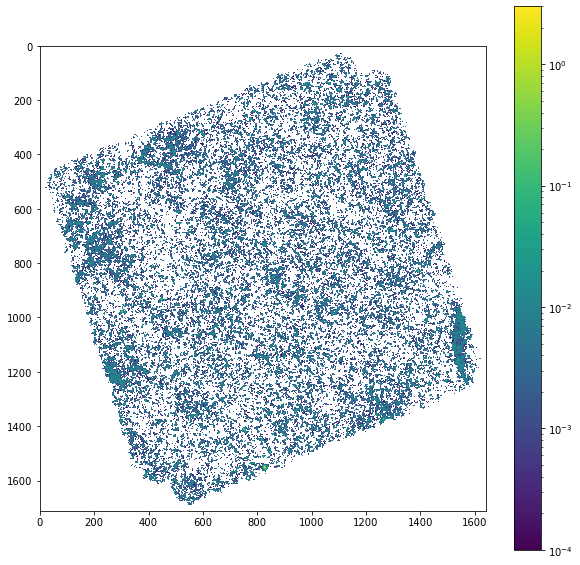

In [36]:
plt.figure(figsize=(10,10),facecolor='white')
# plt.imshow(data,vmin=-.2,vmax=3)
plt.imshow(data,norm=LogNorm(vmin=0.0001, vmax=3))
plt.colorbar()
plt.show()

-0.0031605302065583585
-0.0031605302065583585
[[-0.00316053]]


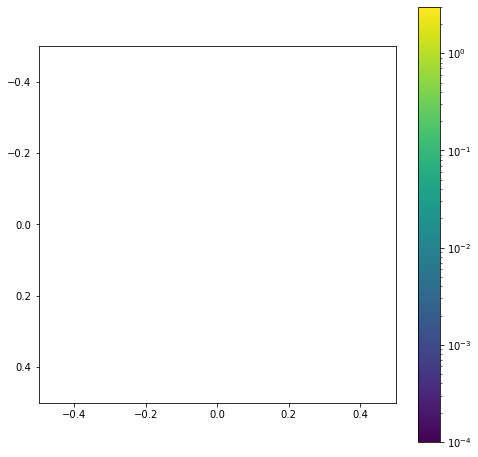

In [37]:
position = SkyCoord(cRA*u.degree, cDec*u.degree)

size=1*u.pixel
cutout = Cutout2D(data, position ,size, wcs = wcs1)

print(np.max(cutout.data))
print(np.sum(cutout.data))
print(cutout.data)

detection = cutout.data[0]

plt.figure(figsize=(8,8),facecolor='white')
plt.imshow(cutout.data,norm=LogNorm(vmin=0.0001, vmax=3))
plt.colorbar()
plt.show()

0.001679484680428252
0.001679484680428252
[[0.00167948]]
[-0.00316053] [0.00167948]
[-1.88184521]


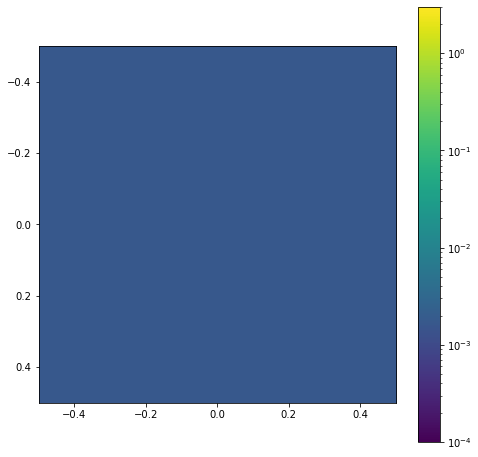

In [38]:
position = SkyCoord(cRA*u.degree, cDec*u.degree)

size=1*u.pixel
cutout = Cutout2D(err, position ,size, wcs = wcs1)

print(np.max(cutout.data))
print(np.sum(cutout.data))
print(cutout.data)

error = cutout.data[0]

print(detection,error)
print(detection/error)

plt.figure(figsize=(8,8),facecolor='white')
plt.imshow(cutout.data,norm=LogNorm(vmin=0.0001, vmax=3))
plt.colorbar()
plt.show()

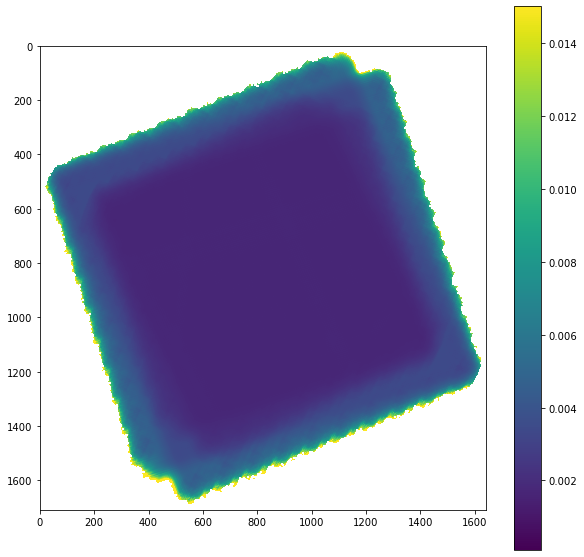

In [22]:
plt.figure(figsize=(10,10),facecolor='white')
plt.imshow(err,vmin=0.0001, vmax=0.015)
# plt.imshow(err,norm=LogNorm(vmin=0.001, vmax=0.1))
plt.colorbar()
plt.show()

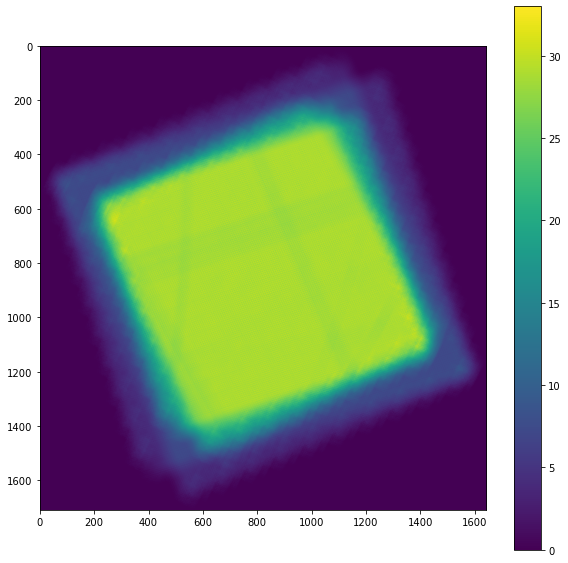

In [9]:
plt.figure(figsize=(10,10),facecolor='white')
plt.imshow(exp,vmin=0.0, vmax=33)
# plt.imshow(exp,norm=LogNorm(vmin=0.001, vmax=2))
plt.colorbar()
plt.show()

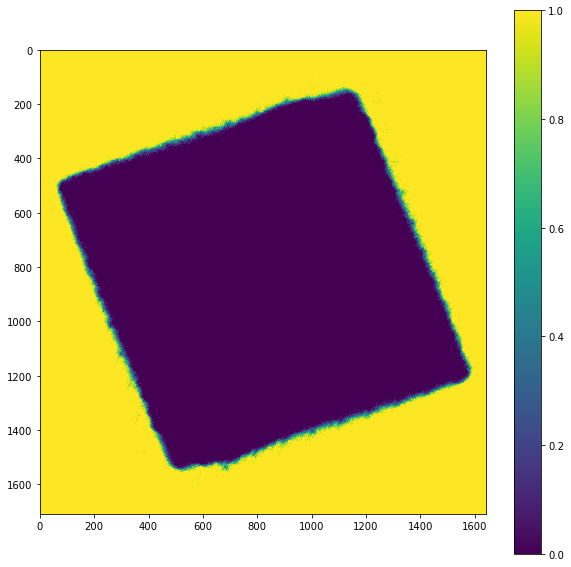

In [10]:
plt.figure(figsize=(10,10),facecolor='white')
plt.imshow(mask,vmin=0.0, vmax=1)
# plt.imshow(exp,norm=LogNorm(vmin=0.001, vmax=2))
plt.colorbar()
plt.show()